In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (15,8)

FILEPATH = {
    '/Users/abilangbridge/Downloads/PPO_simple_ba65f_00000_0_2023-03-08_20-42-23/': '1 agent train',
    '/Users/abilangbridge/Downloads/PPO_simple_445bb_00000_0_2023-03-10_19-03-39/': '10 agent train',
    '/Users/abilangbridge/Downloads/PPO_simple_0af5b_00000_0_2023-03-13_01-40-32/': '1,000 agent train',
}

# Optimality Plots

In [2]:
df = pd.read_csv('optimality_eval.csv')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.head()

,filepath,checkpoint,num_agents,mean_len,mean_tot_reward,mean_optimality,optimality_0,optimality_1,optimality_2
0,/Users/abilangbridge/Downloads/PPO_simple_ba65...,50,1,3.249267,-59096.058061,0.546391,0.546391,NaN,NaN
1,/Users/abilangbridge/Downloads/PPO_simple_ba65...,100,1,2.638806,-899.678060,0.560637,0.560637,NaN,NaN
2,/Users/abilangbridge/Downloads/PPO_simple_ba65...,150,1,2.678019,-40638.477907,0.578919,0.578919,NaN,NaN
3,/Users/abilangbridge/Downloads/PPO_simple_ba65...,200,1,2.625954,-17408.640449,0.559126,0.559126,NaN,NaN
4,/Users/abilangbridge/Downloads/PPO_simple_ba65...,250,1,2.577982,-921.135324,0.604998,0.604998,NaN,NaN


1 agent train, 1 agents test: max 0.786, unfit 0.786, fit nan
10 agent train, 1 agents test: max 0.803, unfit 0.803, fit nan
1,000 agent train, 1 agents test: max nan, unfit nan, fit nan


/Users/abilangbridge/.pyenv/versions/3.9.0/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


1 agent train, 10 agents test: max 0.816, unfit 0.818, fit 0.821
10 agent train, 10 agents test: max 0.873, unfit 0.876, fit 0.880
1,000 agent train, 10 agents test: max nan, unfit nan, fit nan


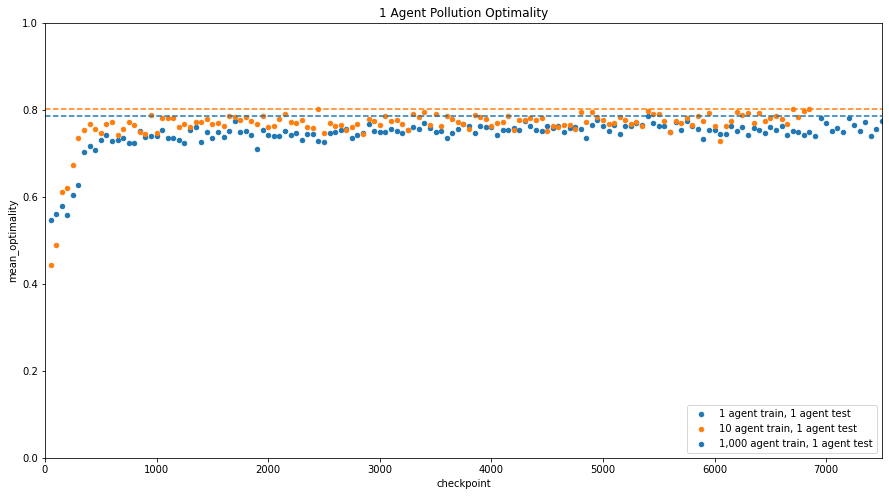

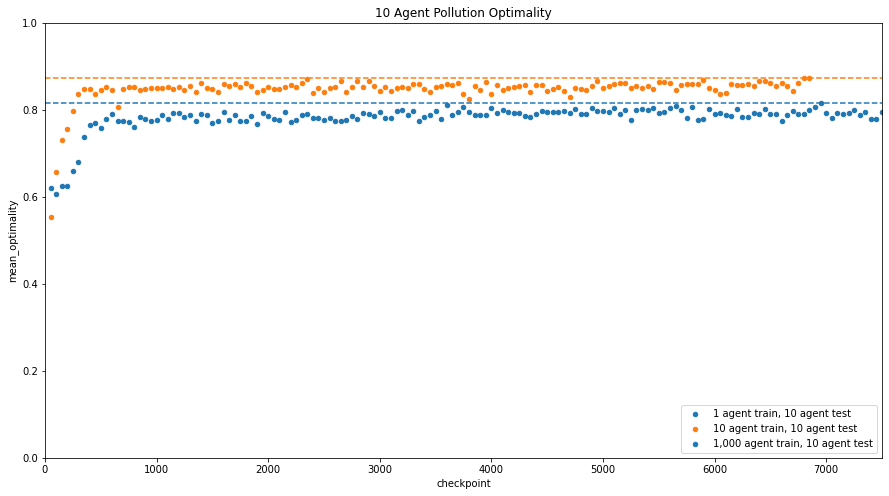

In [3]:
for agents in df.num_agents.unique():
    fig = plt.figure()
    ax = plt.gca()
    plt.ylim(0, 1)
    plt.xlim(0, 7500)
    plt.title(f'{agents} Agent Pollution Optimality')

    tmp = df[df.num_agents == agents]

    for path, alias in FILEPATH.items():
        if '10' in alias: color = 'tab:orange'
        else: color = 'tab:blue'

        tmp[tmp.filepath == path].plot(kind='scatter', x='checkpoint', y='mean_optimality', ax=ax, color=color, label=f'{alias}, {agents} agent test')
        ax.hlines(y=tmp[tmp.filepath == path].mean_optimality.max(), xmin=plt.xlim()[0], xmax=plt.xlim()[1], colors=color, linestyles='--')
        
        print(f'{alias}, {agents} agents test: max {tmp[tmp.filepath == path].mean_optimality.max():.3f}, unfit {tmp[tmp.filepath == path].optimality_0.max():.3f}, fit {tmp[tmp.filepath == path].optimality_2.max():.3f}')
    

    plt.legend(loc='lower right')

# Pollution Plots

In [4]:
df = pd.read_csv('pollution_eval.csv')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.head()

,filepath,checkpoint,num_agents,mean_len,mean_tot_reward,mean_pollution,pollution_0,pollution_1,pollution_2,duration_0,duration_1,duration_2
0,/Users/abilangbridge/Downloads/PPO_simple_0af5...,50,10,5.917010,-2.242776e+06,0.034634,0.036707,0.032945,0.032784,162.884080,160.170063,158.095171
1,/Users/abilangbridge/Downloads/PPO_simple_0af5...,100,10,6.276304,-3.599571e+06,0.032276,0.031148,0.031841,0.033939,143.940382,145.482639,146.178827
2,/Users/abilangbridge/Downloads/PPO_simple_0af5...,150,10,6.285263,-3.574800e+06,0.028324,0.026800,0.028590,0.029559,139.824023,139.620450,140.186408
3,/Users/abilangbridge/Downloads/PPO_simple_0af5...,200,10,6.638889,-5.066976e+06,0.024985,0.024459,0.026303,0.024941,123.558148,128.818302,120.179100
4,/Users/abilangbridge/Downloads/PPO_simple_ba65...,50,10,5.285000,-1.152655e+05,0.132945,0.138503,0.133328,0.125152,565.028752,535.507329,528.103804


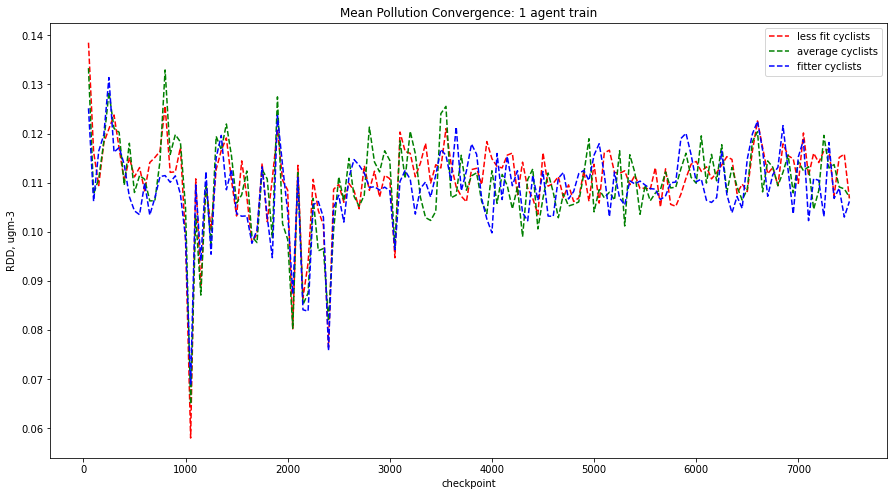

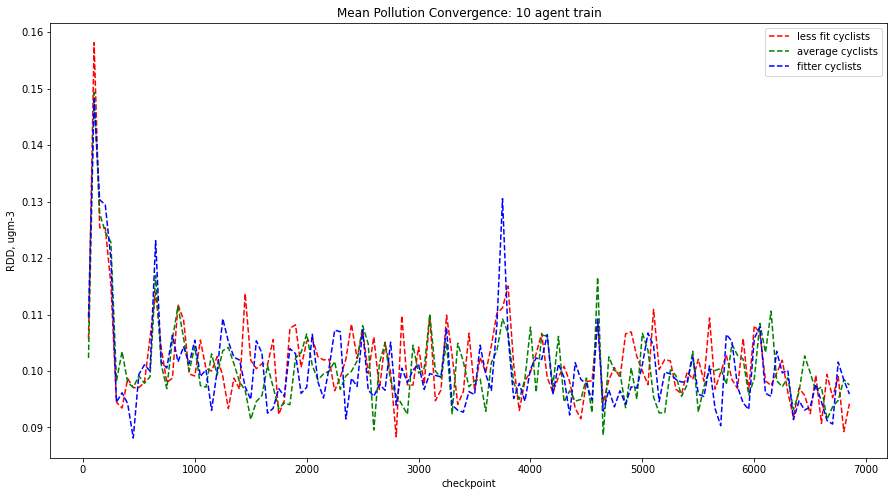

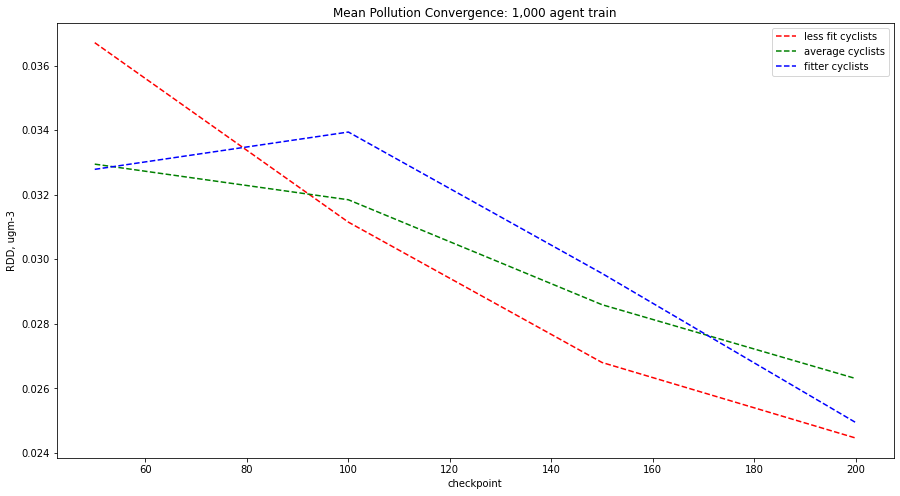

In [7]:
df['tot_pollution'] = df['pollution_0'] + df['pollution_1'] + df['pollution_2']
for path, alias in FILEPATH.items():
    fig = plt.figure()
    ax = plt.gca()
    # plt.xlim(0, 7500)

    tmp = df[df.filepath == path]
    plt.title(f'Mean Pollution Convergence: {alias}')

    fit_dict = {0: 'less fit', 1: 'average', 2: 'fitter'}
    colors = ['r', 'g', 'b']
    for x in range(3):
        tmp.plot(kind='line', linestyle='--', x='checkpoint', y=f'pollution_{x}', ax=ax, color=colors[x], label=f'{fit_dict[x]} cyclists')
        # kind='line', linestyle='--',
    # tmp.plot(kind='line', linestyle='--', x='checkpoint', y='tot_pollution', ax=ax, color='gray', label=f'total pollution')
    # ax.hlines(y=tmp.mean_pollution.max(), xmin=plt.xlim()[0], xmax=plt.xlim()[1], colors=color, linestyles='--')
        
    plt.ylabel('RDD, ugm-3')
    plt.legend(loc='upper right')

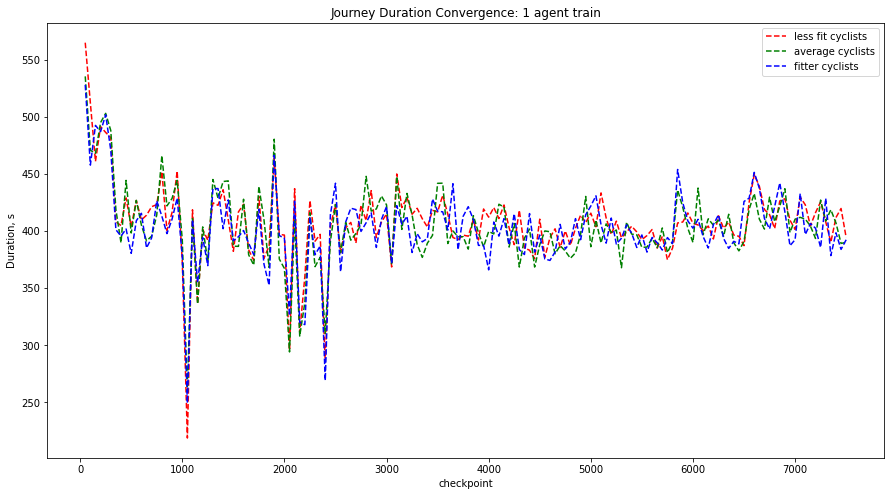

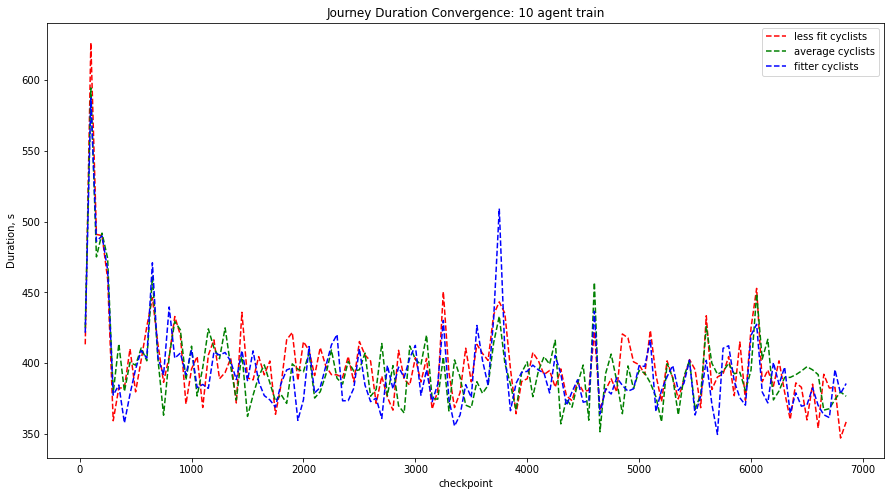

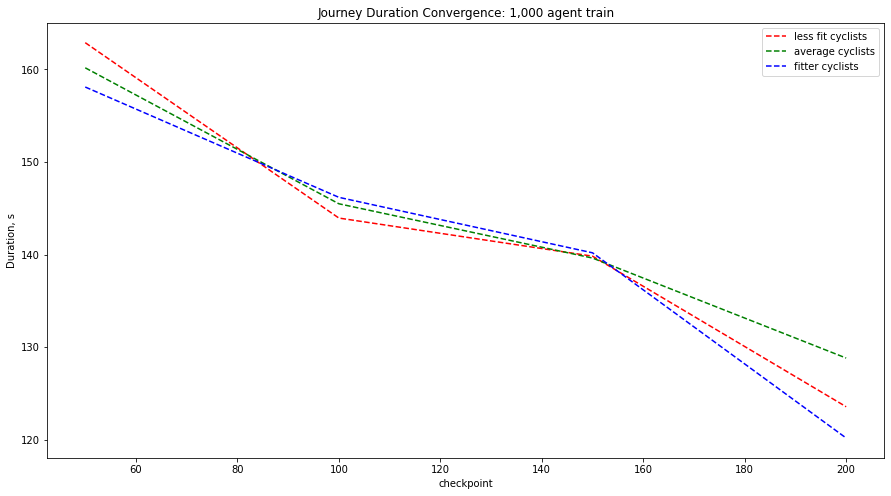

In [6]:
for path, alias in FILEPATH.items():
    fig = plt.figure()
    ax = plt.gca()
    # plt.xlim(0, 7500)

    tmp = df[df.filepath == path]
    plt.title(f'Journey Duration Convergence: {alias}')

    fit_dict = {0: 'less fit', 1: 'average', 2: 'fitter'}
    colors = ['r', 'g', 'b']
    for x in range(3):
        tmp.plot(kind='line', linestyle='--', x='checkpoint', y=f'duration_{x}', ax=ax, color=colors[x], label=f'{fit_dict[x]} cyclists')
        # ax.hlines(y=tmp.mean_pollution.max(), xmin=plt.xlim()[0], xmax=plt.xlim()[1], colors=color, linestyles='--')
        
    plt.ylabel('Duration, s')
    plt.legend(loc='upper right')